<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/6_16_ESAA_YB_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

범위: 파이썬 머신러닝 완벽가이드 ch7 pg. 463~487

## 05. DBSCAN
[DBSCAN 개요]

**DBSCAN(Density-Based Spatial Clustering of Applications with Noise)**은 밀도 기반 군집화 알고리즘으로, 복잡한 형태의 데이터에도 잘 작동함.

GMM, K-평균, 평균 이동 등은 원형이 아닌 복잡한 분포에서 잘 동작하지 않지만, DBSCAN은 밀도 차이를 이용해 효과적으로 군집화함.

✅ DBSCAN의 핵심 개념

주요 파라미터:

eps: 입실론 반경 (이웃 탐색 반경)

minPts: 반경 내 포함되어야 하는 최소 데이터 수 (자신 포함)

✅ 포인트의 종류

Core Point (핵심 포인트): 반경 내에 minPts 이상 있음

Neighbor Point (이웃 포인트): 반경 내에 있지만 minPts는 안 됨

Border Point (경계 포인트): minPts는 안 되지만 Core Point의 반경 안에 있음

Noise Point (잡음 포인트): 아무 군집에도 속하지 않음 (고립됨)

✅ 군집화 과정 설명

Core Point(P1) 발견 → 반경 내 7개 데이터 포함 (조건 만족)

P2도 Core Point → P1과 직접 연결되어 같은 군집

P3은 minPts 미만이지만 Core인 P2 반경 안 → Border Point

P5는 반경 내 포인트 부족 → Noise Point

✅ 군집 확장 원리

Core Point들끼리 직접 연결되며 군집 형성

Border Point는 군집의 외곽을 이룸

Noise Point는 어떤 군집에도 속하지 않음


✅ 사이킷런 적용 시 주요 파라미터

eps         # 입실론 반경

min_samples # 최소 샘플 수 (minPts)


In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [28]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            isNoise=True

        # 군집별로 다른 마커로 산점도 적용
        if isNoise:
            marker='.'
            isNoise=False
        else:
            marker=markers[label % len(markers)]

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=marker)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                        alpha=0.9, edgecolor='k', marker=marker)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='black',
                        edgecolor='k', marker='' % label)

    if iscenter:
        plt.title(clusterobj.__class__.__name__ + ' Clusters')
    else:
        plt.title('Data Clusters')
    plt.show()

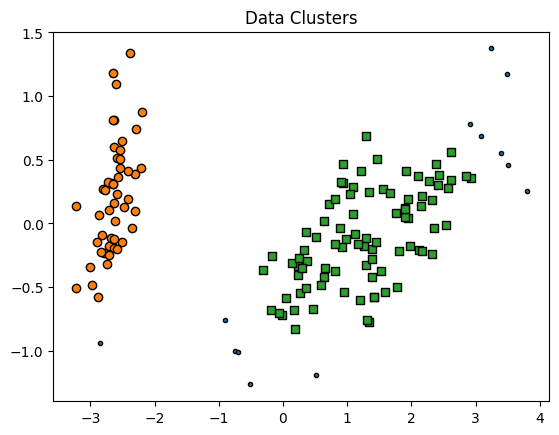

In [4]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


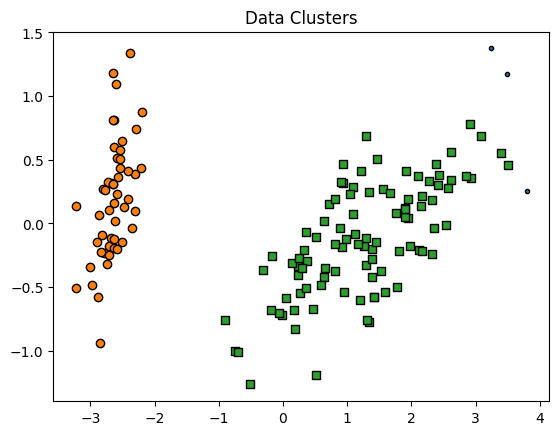

In [5]:
# ops 0.6 -> 0.8로 증가
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [6]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

[DBSCAN 적용하기 - make_circles() 데이터 세트]

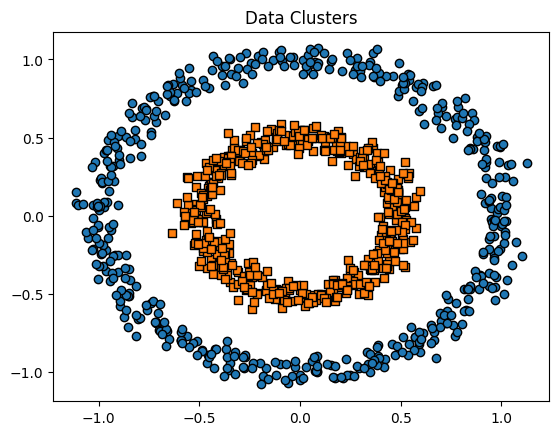

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

<ipython-input-3-1513445931>:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='black',


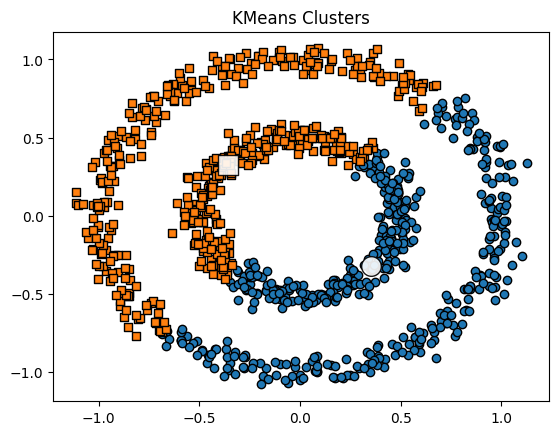

In [8]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

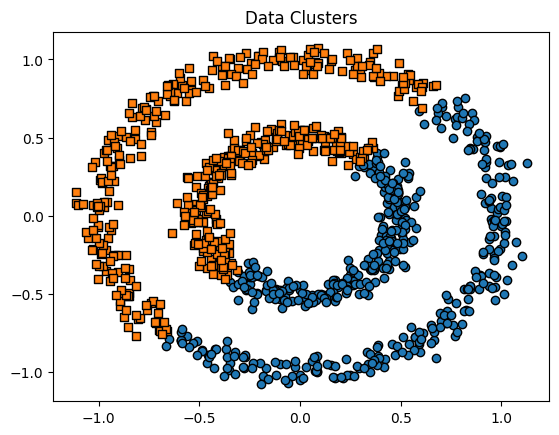

In [9]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

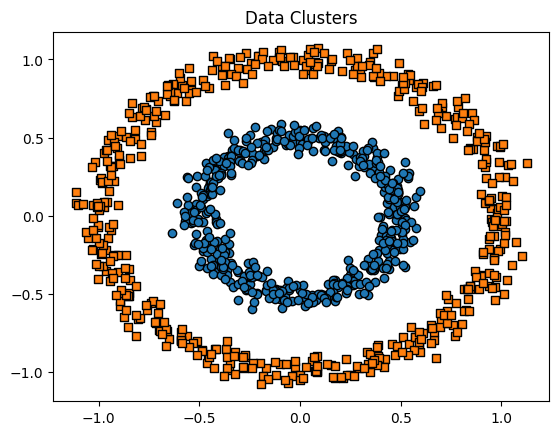

In [10]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

##06. 군집화 실습-고객 세그먼테이션

[고객 세그먼테이션의 정의와 기법]
✅ 고객 세그먼테이션 정의

다양한 기준으로 고객을 분류하여 마케팅이나 CRM에 활용하는 기법.

✅ 분류 기준 예시

인구통계 기반:
사는 지역, 결혼 여부, 성별, 소득, 직업 등

구매 행동 기반:
월별 사용액, VIP 상품 사용 여부, 최근 구매 상품, 구매 주기, 연간 프로모션 참여 횟수 등

✅ 세분화 기준 - RFM 분석

고객을 효과적으로 군집화하기 위한 대표 기준

Recency (R): 마지막 구매로부터의 기간

Frequency (F): 구매 횟수

Monetary Value (M): 총 구매 금액



In [30]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('/content/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [31]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [32]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [33]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [34]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


[RFM 기반 데이터 가공]

In [35]:
retail_df['sale_amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [36]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [37]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

In [38]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount' : 'sum'
}

cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [39]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x : x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


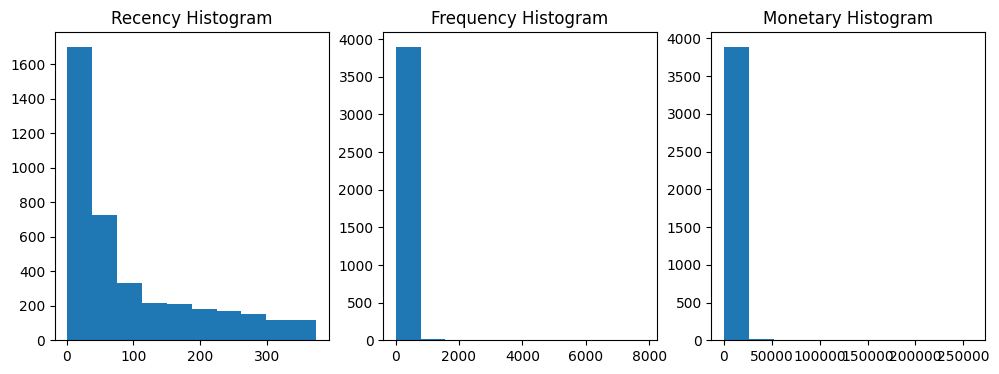

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [41]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.576


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

def visualize_silhouette(cluster_list, X_features):
    for n_cluster in cluster_list:
        # 군집 모델 생성 및 예측
        kmeans = KMeans(n_clusters=n_cluster, random_state=0)
        labels = kmeans.fit_predict(X_features)

        # 실루엣 스코어 계산
        sil_values = silhouette_samples(X_features, labels)
        y_lower = 10
        plt.figure(figsize=(7, 7))

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_sil_values)
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title(f"Silhouette Plot for {n_cluster} Clusters")
        plt.xlabel("Silhouette Coefficient Values")
        plt.ylabel("Cluster Label")
        plt.axvline(x=silhouette_score(X_features, labels), color="red", linestyle="--")
        plt.yticks([])
        plt.show()

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

def visualize_kmeans_plot_multi(cluster_list, X_features):
    n_cols = len(cluster_list)
    fig, axes = plt.subplots(figsize=(5 * n_cols, 4), nrows=1, ncols=n_cols)

    for i, n_cluster in enumerate(cluster_list):
        clusterer = KMeans(n_clusters=n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        # 시각화
        ax = axes[i]
        sns.scatterplot(x=X_features[:, 0], y=X_features[:, 1],
                        hue=cluster_labels, palette='Set2', ax=ax, legend=False)
        ax.set_title(f'KMeans Clustering: {n_cluster} clusters')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()


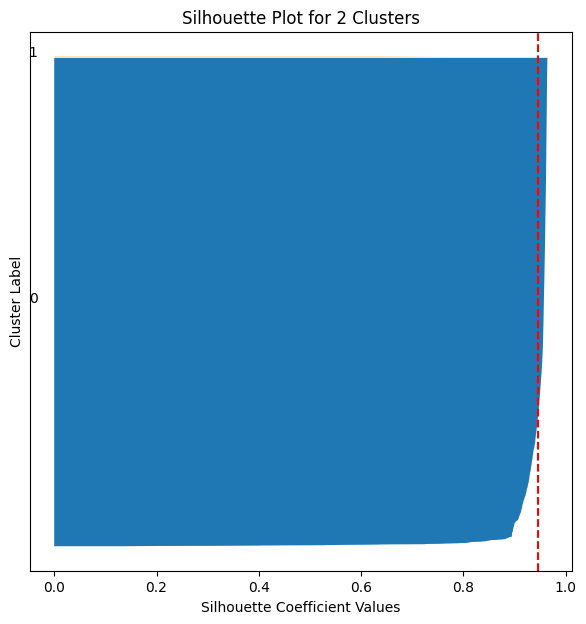

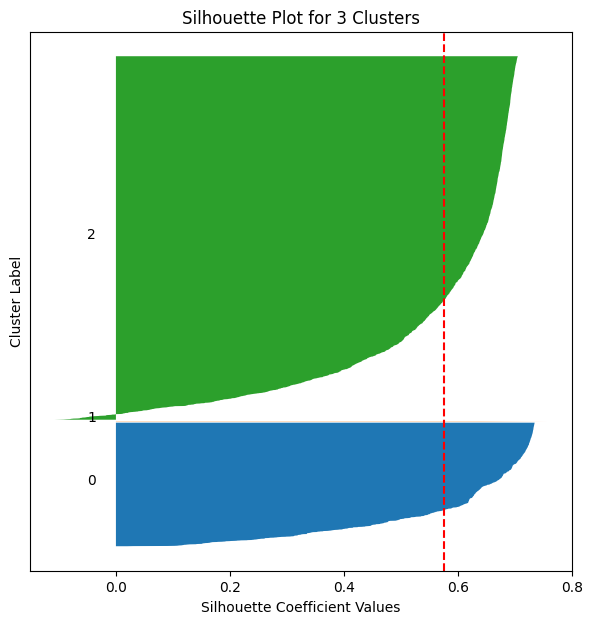

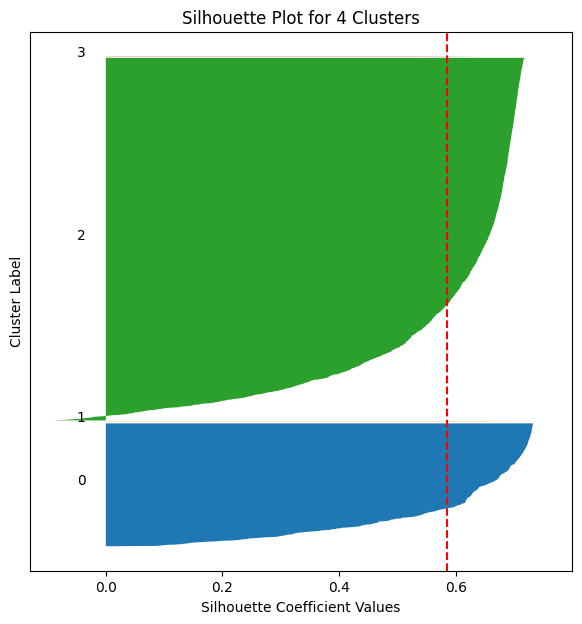

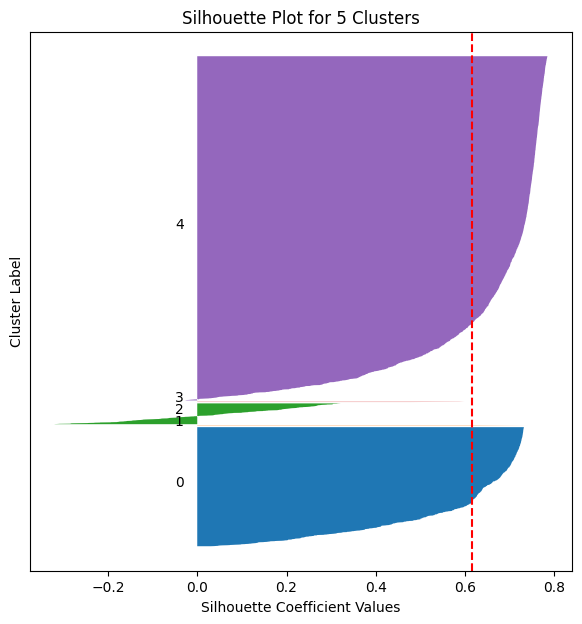

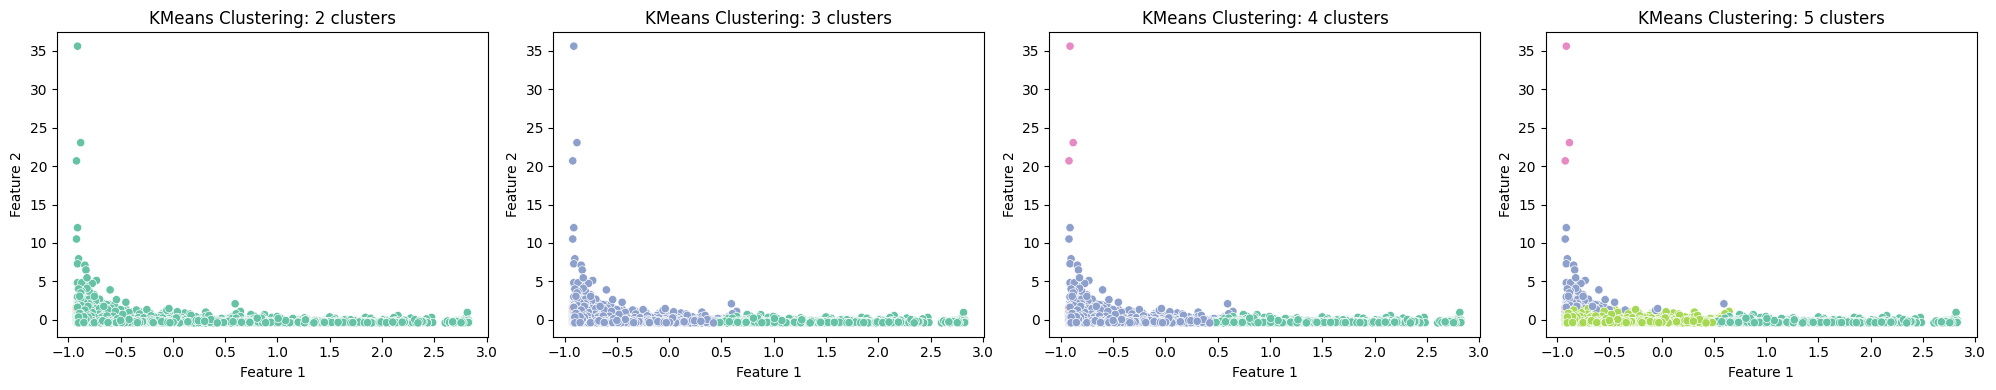

In [45]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
lables = kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = lables

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.240


##07. 정리
✅ 군집화 기법 요약

🔹 K-평균 (K-Means)

거리 기반 알고리즘

단순하고 직관적이지만, 군집 수를 미리 정해야 하고 복잡한 분포에는 부적합

🔹 평균 이동 (Mean Shift)

데이터 밀도가 높은 쪽으로 중심을 이동하며 군집화

이미지나 영상 데이터에서 객체 추적 등에 활용

K-평균보다 유연하지만, 계산 비용이 큼

🔹 GMM (Gaussian Mixture Model)

데이터를 여러 개의 정규분포 혼합 모델로 간주

서로 다른 정규분포를 추정해 군집화

다양한 데이터에 적용 가능하지만, 수렴까지 시간이 오래 걸림

🔹 DBSCAN

밀도 기반 군집화 기법

반경(eps) 내 최소 데이터 수(minPts)로 핵심/경계/잡음 포인트 구분

복잡하고 기하학적인 분포에도 효과적으로 군집화 가능

군집 수를 미리 정하지 않아도 됨